In [1]:
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot 
import matplotlib.image as mpimg
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('fer2013.csv')

In [3]:
df.head(5)

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [4]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

In [5]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 

In [6]:
np.array(df.pixels.loc[0].split(' ')).reshape(48,48)

array([['70', '80', '82', ..., '52', '43', '41'],
       ['65', '61', '58', ..., '56', '52', '44'],
       ['50', '43', '54', ..., '49', '56', '47'],
       ...,
       ['91', '65', '42', ..., '72', '56', '43'],
       ['77', '82', '79', ..., '105', '70', '46'],
       ['77', '72', '84', ..., '106', '109', '82']], dtype='<U3')

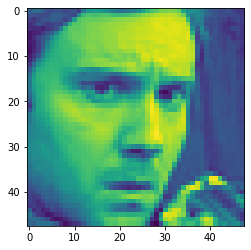

In [7]:
# anger
pyplot.imshow(np.array(df.pixels.loc[0].split(' ')).reshape(48,48).astype('float'))

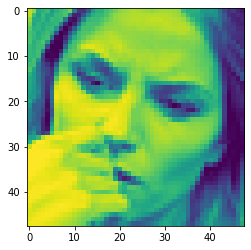

In [8]:
# faer
pyplot.imshow(np.array(df.pixels.loc[2].split(' ')).reshape(48,48).astype('float'))

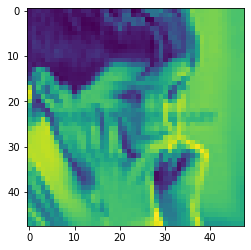

In [58]:
# sadness
pyplot.imshow(np.array(df.pixels.loc[3].split(' ')).reshape(48,48).astype('float'))

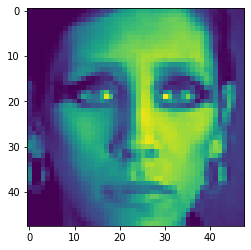

In [59]:
# neutral
pyplot.imshow(np.array(df.pixels.loc[4].split(' ')).reshape(48,48).astype('float'))

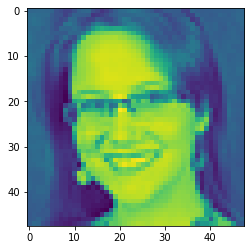

In [60]:
# happiness
pyplot.imshow(np.array(df.pixels.loc[7].split(' ')).reshape(48,48).astype('float'))

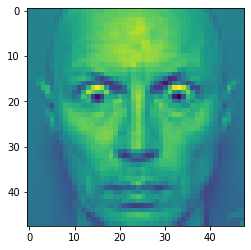

In [61]:
# surprise
pyplot.imshow(np.array(df.pixels.loc[15].split(' ')).reshape(48,48).astype('float'))

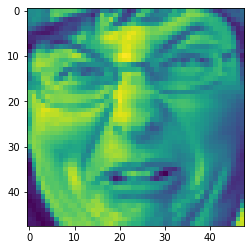

In [62]:
# disgust
pyplot.imshow(np.array(df.pixels.loc[299].split(' ')).reshape(48,48).astype('float'))


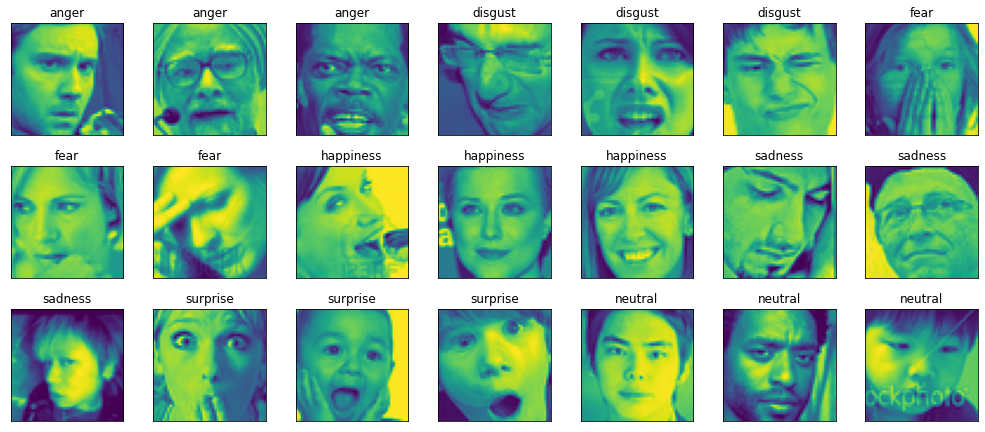

In [63]:
fig = pyplot.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        pyplot.tight_layout()

In [64]:
img_array = df.pixels.apply(lambda x :np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))

In [65]:
img_array = np.stack(img_array, axis = 0)
img_array.shape

(35887, 48, 48, 1)

In [66]:
labels = df.emotion.values

In [67]:
X_train,X_test,y_train,y_test = train_test_split(img_array,labels,test_size = .1)

In [68]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((32298, 48, 48, 1), (32298,), (3589, 48, 48, 1), (3589,))

In [69]:
X_train = X_train/255
X_test = X_test/255

In [70]:
basemodel = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1000,activation='relu'),
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [71]:
basemodel.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 4, 4, 128)       

In [72]:
basemodel.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.0001),
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])

In [73]:
import os
try:
    os.mkdir('checkpoint')
except:
    pass

In [74]:
file_name = 'best_model.h5'
checkpoint_path= os.path.join('checkpoint',file_name)


call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')


In [ ]:
basemodel.fit(X_train,y_train,epochs=20,validation_split=.1,callbacks=call_back)

Epoch 1/20
908/909 [============================>.] - ETA: 0s - loss: 1.8035 - accuracy: 0.2538
Epoch 00001: val_accuracy improved from -inf to 0.27678, saving model to checkpoint\best_model.h5
909/909 [==============================] - 106s 109ms/step - loss: 1.8035 - accuracy: 0.2537 - val_loss: 1.7547 - val_accuracy: 0.2768
Epoch 2/20
181/909 [====>.........................] - ETA: 1:20 - loss: 1.7507 - accuracy: 0.2869

In [ ]:
checkpoint_path

In [ ]:
final_model = tf.keras.models.load_model(checkpoint_path)
from IPython.display import clear_output
import time
for k in range(40):
    print(f'Actual label is {label_to_text[y_test[k]]}')
    predicted_class = final_model.predict(tf.expand_dims(X_test[k],0)).argmax()
    print(f'Predicted label is {label_to_text[predicted_class]}')
    pyplot.imshow(X_test[k].reshape((48,48)))
    pyplot.show()
    time.sleep(5)
    clear_output(wait=True)

In [ ]:
import cv2
# loading pre-trained data on face frontals from opencv (hear cascade algorithm)
trained_face_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#Choosing an image to detect faces with
img = mpimg.imread('rihanna-smells-really-good-323.jpg')

# plotting the imge 
plt.figure(figsize=(20, 20))

plt.axis("off")

plt.imshow(img)

plt.show

In [ ]:
# Must convert the image to grayscale
grayscaled_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# plotting the imge 
plt.figure(figsize=(20, 20))

plt.axis("off")

plt.imshow(grayscaled_img, cmap='gray')

plt.show

In [ ]:
# Detect Faces
face_coordinates = trained_face_data.detectMultiScale(grayscaled_img)

In [ ]:
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

In [ ]:

(x1, x2, y1, y2)  = face_coordinates[0]
cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)


In [ ]:
# Draw rectangles around the faces
(x, y, w, h)  = face_coordinates[0]
cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 4)

In [ ]:
cv2.rectangle(img, (5, 5), (220, 220), (255, 0, 0), 6) 

In [ ]:
# plotting the imge 
plt.figure(figsize=(20, 20))

plt.axis("off")

plt.imshow(img)

plt.show

In [ ]:
!pip install mediapipe opencv-python

In [ ]:
import cv2
import mediapipe as mp
import time 
from cvzone.HandTrackingModule import HandDetector
import numpy as np

In [ ]:
cap = cv2.VideoCapture(r"C:\Users\rutho\Downloads\Project 5\Vidoes_face_dection")
pTime = 0

In [ ]:
while True:
    success, img = cap.read()
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
    cv2.putText(img, f'FPS: {int(fps)}', (20, 70), cv2.FONT_HERSHEY_PLAIN,
               3, (235, 0, 8), 2)
    cv2.imshow("Image",img)
    cv2.waitKey(1)

In [ ]:
import cv2
video = cv2.VideoCapture(r"C:\Users\rutho\Downloads\Project 5\Vidoes_face_dection")
if video.isOpened():
    while True:
        check, frame = video.read()
        if check:
            cTime = time.time()
            fps = 1 / (cTime - pTime)
            pTime = cTime
            cv2.putText(img, f'FPS: {int(fps)}', (20, 70), cv2.FONT_HERSHEY_PLAIN,
               3, (235, 0, 8), 2)
            cv2.imshow('Color Frame', frame)
            key = cv2.waitKey(50)
            if key == ord('q'):
                break
        else:
            print('Frame not available')
            print(video.isOpened())

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture("Vidoes_face_dection.mp4")

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
   

In [ ]:
import FaceReco.FaceReco as fr
fr_object1 =  fr.FaceReco()
fr_object1.train_model("lfw_selected/face")

In [ ]:
import cv2

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#trained_face_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


In [ ]:
img = cv2.imread('rihanna-savage-fenty-show.jpg')

In [ ]:
faces = face_cascade.detectMultiScale(img, 1.1, 4)
#face_coordinates = trained_face_data.detectMultiScale(grayscaled_img)

In [ ]:
#Draw rectangle around the faces
for (x, y, w, h) in faces: 
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

In [ ]:
#Export the result
cv2.imwrite("face_detected.png", img) 
print('Photo successfully exported!')

In [9]:
import cv2

In [10]:
from deepface import DeepFace

In [11]:
img = cv2.imread('rihanna-savage-fenty-show.jpg')

In [12]:
import matplotlib.pyplot as plt

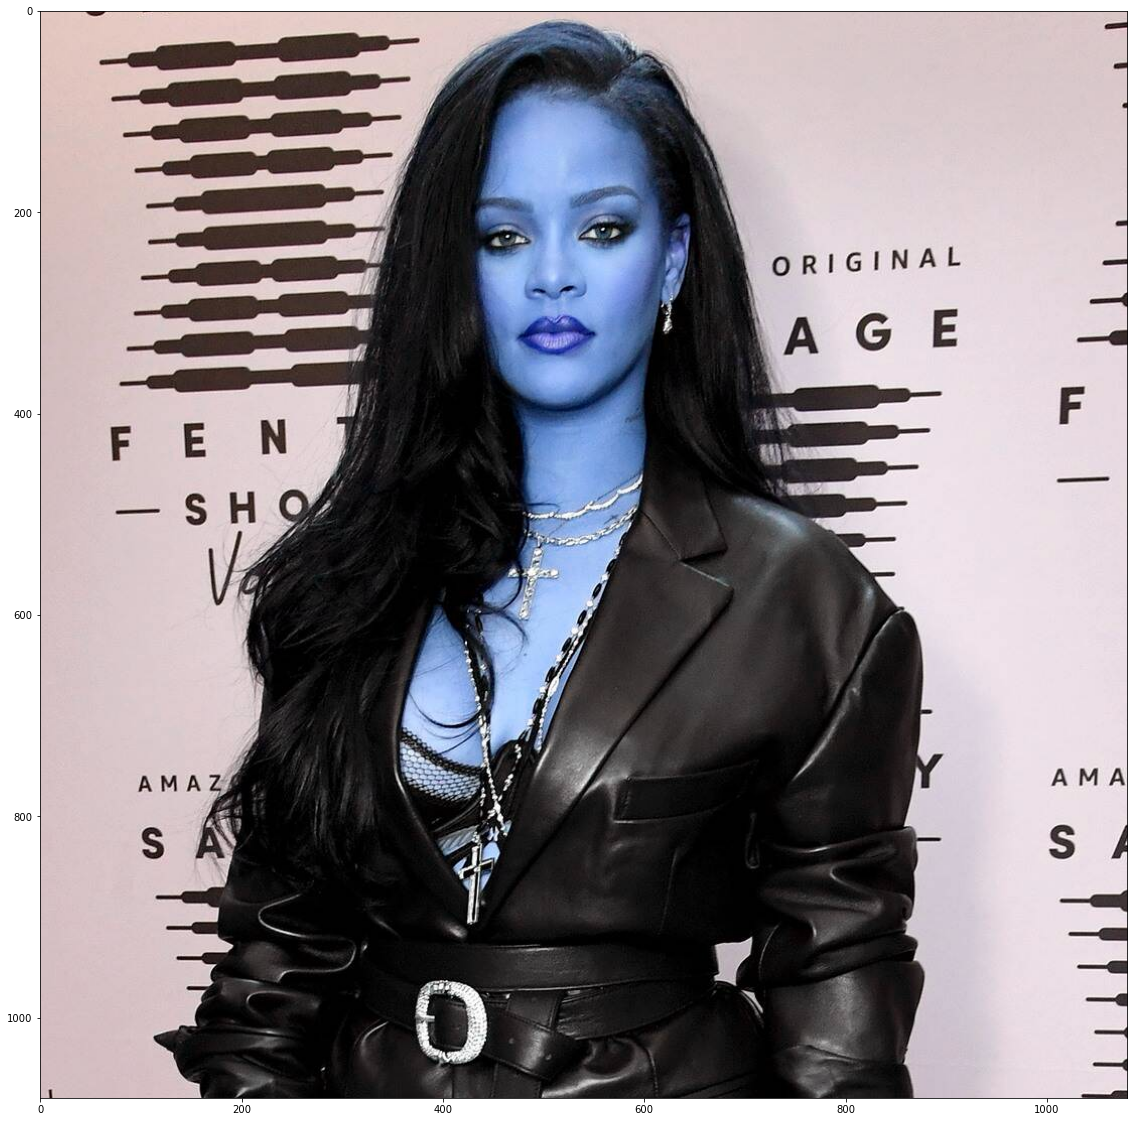

In [13]:
plt.figure(figsize=(20, 20))
plt.imshow(img)

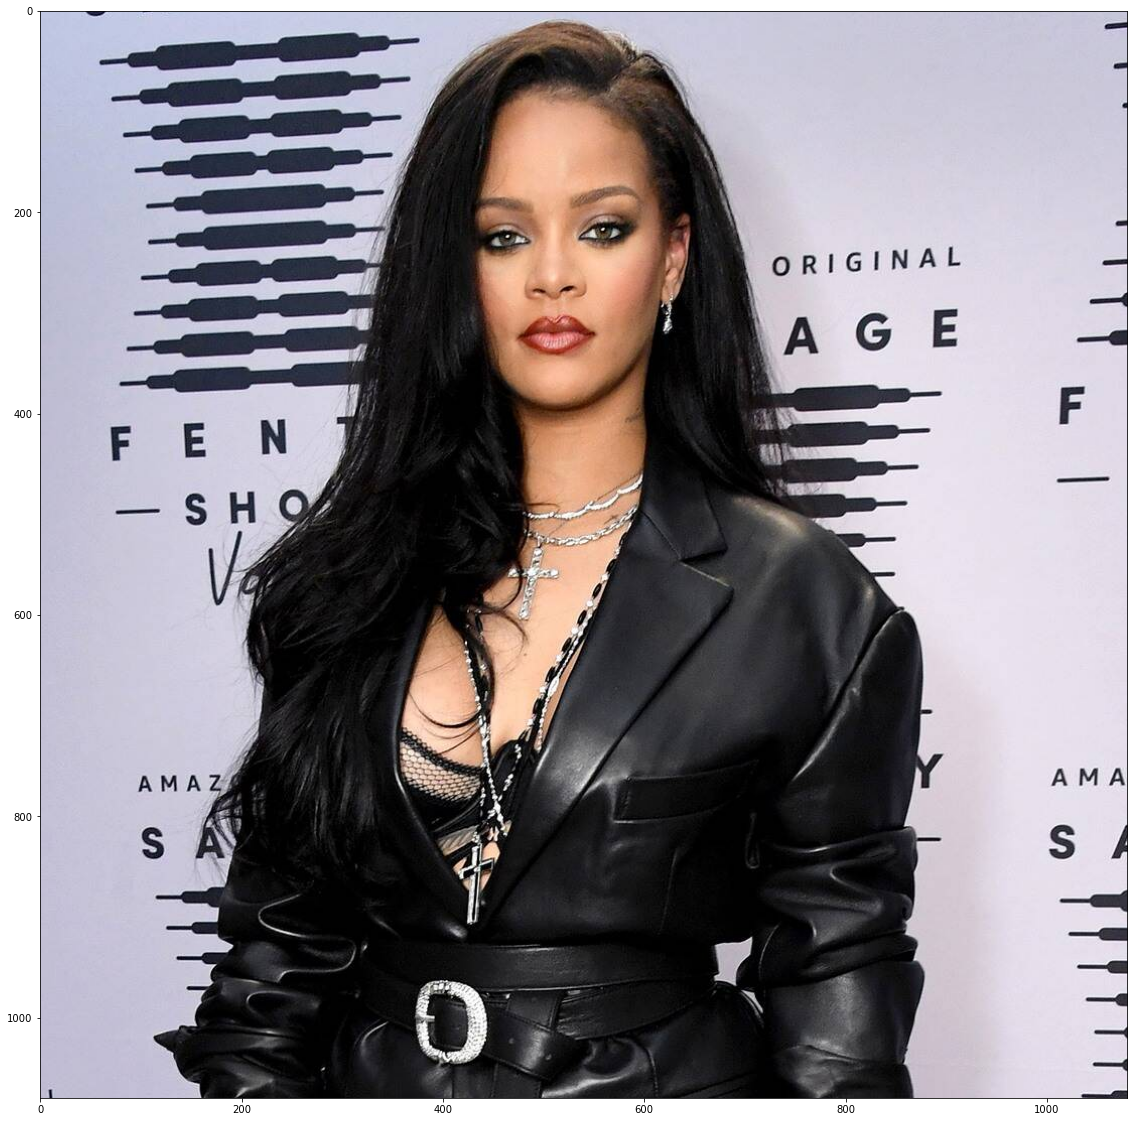

In [14]:
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:20<00:00,  5.04s/it]


In [16]:
predictions

{'emotion': {'angry': 8.055975288152695,
  'disgust': 0.0011951882697758265,
  'fear': 50.64229369163513,
  'happy': 0.030811774195171893,
  'sad': 24.388308823108673,
  'surprise': 0.9282977320253849,
  'neutral': 15.953116118907928},
 'dominant_emotion': 'fear',
 'region': {'x': 386, 'y': 122, 'w': 260, 'h': 260},
 'age': 34,
 'gender': 'Woman',
 'race': {'asian': 3.540823608636856,
  'indian': 11.196685582399368,
  'black': 0.5584529135376215,
  'white': 31.493306159973145,
  'middle eastern': 14.26495909690857,
  'latino hispanic': 38.945773243904114},
 'dominant_race': 'latino hispanic'}

In [17]:
type(predictions)

dict

In [18]:
predictions['dominant_emotion']

'fear'

In [19]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascades_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [23]:
img = mpimg.imread('rihanna-smells-really-good-323.jpg')

In [24]:
coloredcaled_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
faces = faceCascade.detectMultiScale(coloredcaled_img, 1.1, 4)

for(x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [25]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,
           predictions['dominant_emotion'],
           (0, 200),
           font, 8,
           (0, 0, 255),
           8,
           cv2.LINE_4);

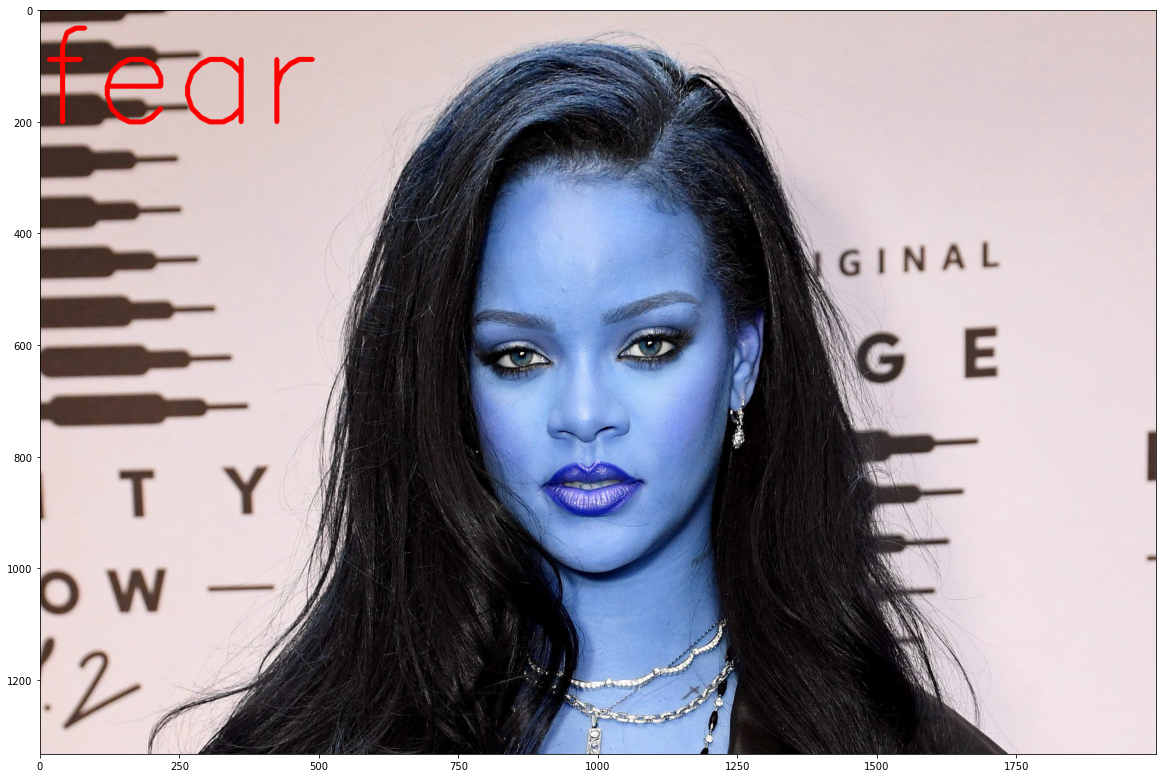

In [26]:
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [27]:
import cv2
import mediapipe as mp
import time 
from cvzone.HandTrackingModule import HandDetector
import numpy as np

In [44]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascades_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open webcam')
    

    
while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(frame, actions = ['emotion'],enforce_detection=False)
    
    img = cv2.imread('rihanna-savage-fenty-show.jpg')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    faces = face_cascade.detectMultiScale(coloredcaled_img, 1.1, 4)
    
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h+10), (0, 255, 0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,
                result['dominant_emotion'],
                (50, 50),
                font, 3,
                (0, 0, 255),
                2,
           cv2.LINE_4);
    cv2.imshow('Original vidoe', frame)
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
        
cap.realease()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [47]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascades_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open webcam')
    
mpDraw = mp.solutions.drawing_utils
mpFaceMesh = mp.solutions.face_mesh
faceMesh = mpFaceMesh.FaceMesh(max_num_faces = 2)
#drawSpec = mpDraw.DrawingSpec(thickness = 1, circle_radius=2, color=(0,255,0))
circleDrawingSpec = mpDraw.DrawingSpec(thickness=1, circle_radius=1, color=(0,255,0))
lineDrawingSpec = mpDraw.DrawingSpec(thickness=1, color=(0,255,0))
 
    
while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(frame, actions = ['emotion'],enforce_detection=False)
    
    img = cv2.imread('rihanna-savage-fenty-show.jpg')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
    results = faceMesh.process(gray)
    if results.multi_face_landmarks:
        for facelms in results.multi_face_landmarks:
            mpDraw.draw_landmarks(frame, facelms, mpFaceMesh.FACEMESH_CONTOURS,
                                 circleDrawingSpec, lineDrawingSpec)
            for lm in facelms.landmark:
                #print(lm)
                ih, iw, ic = img.shape
                x,y = int(lm.x*iw), int(lm.y*ih)
                print(x,y)
                
            
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h+30), (0, 255, 0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,
                result['dominant_emotion'],
                (50, 50),
                font, 3,
                (0, 0, 255),
                2,
           cv2.LINE_4);
    cv2.imshow('Recognition of Speech Emotion', frame)
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
        
cap.realease()
cv2.destroyAllWindows()

531 1009
533 964
529 976
515 912
532 949
529 927
521 871
415 872
517 821
516 796
509 708
531 1016
531 1021
530 1022
530 1023
531 1028
532 1036
532 1044
530 1057
532 971
516 970
355 792
457 883
443 886
430 885
409 875
468 877
433 835
449 835
419 838
409 846
400 883
484 1083
409 867
358 866
383 869
453 947
513 1009
515 1022
494 1014
482 1018
501 1023
490 1024
466 1035
521 965
519 950
388 825
478 906
484 958
481 949
410 945
517 930
420 805
401 812
367 763
484 818
463 842
454 1023
385 1005
494 966
506 971
468 1022
475 1022
392 799
483 963
447 806
444 791
425 722
380 781
437 757
379 815
367 805
514 1017
498 1020
486 1021
497 968
472 1022
479 1025
476 1022
503 963
492 1022
503 1023
515 1023
513 1057
515 1044
516 1036
516 1029
516 1024
492 1023
490 1025
488 1029
485 1034
469 1002
362 929
530 973
484 1023
482 1024
510 977
487 971
508 974
464 915
442 926
479 955
389 739
402 764
414 790
480 1044
479 795
473 755
464 713
417 882
386 893
475 872
396 851
488 896
493 954
373 902
397 906
416 912
443 9

526 1001
528 954
525 968
512 904
528 939
526 918
519 867
414 870
515 821
514 797
508 711
526 1008
526 1014
525 1016
526 1020
526 1025
526 1033
526 1041
526 1055
528 962
513 962
358 796
455 881
442 883
428 883
409 874
466 876
434 834
449 835
420 838
410 845
399 882
480 1081
409 866
358 869
384 869
450 942
509 1001
510 1015
490 1006
478 1012
496 1017
486 1019
463 1032
518 955
515 940
390 826
476 903
481 951
479 943
407 941
514 921
422 806
403 813
370 766
484 818
462 841
451 1020
383 1012
491 959
503 963
465 1020
472 1019
395 801
480 957
448 806
446 792
426 724
383 783
438 757
381 817
370 808
509 1009
493 1013
482 1015
494 961
469 1020
475 1022
473 1019
500 954
488 1017
499 1017
511 1017
509 1056
510 1041
511 1033
511 1025
512 1020
488 1020
486 1022
484 1026
481 1031
466 996
361 935
527 965
481 1020
479 1020
507 969
484 966
505 966
461 912
439 923
476 949
392 742
405 766
417 792
476 1042
479 795
472 756
464 715
416 880
386 892
473 871
397 850
486 893
490 946
372 902
396 903
414 909
440 90

526 1000
529 955
526 967
513 905
529 940
527 919
519 867
415 869
515 821
514 798
508 712
526 1007
526 1012
525 1014
526 1018
526 1023
526 1030
526 1038
525 1052
529 962
514 961
358 795
456 880
442 882
429 882
410 873
467 875
434 834
449 835
420 838
411 845
400 881
480 1077
410 865
358 867
384 868
451 941
509 999
510 1013
490 1005
478 1009
497 1015
486 1016
463 1029
519 955
516 941
391 826
476 902
482 950
480 942
408 939
515 921
423 807
404 814
371 766
484 819
463 841
452 1017
382 1007
492 958
504 962
465 1016
472 1016
395 801
481 956
449 807
446 793
427 725
383 783
438 759
381 817
370 807
510 1007
494 1011
482 1013
495 960
469 1016
475 1019
473 1015
501 954
488 1014
499 1015
511 1014
509 1052
510 1038
511 1030
511 1023
512 1018
488 1017
487 1019
484 1023
481 1028
466 994
361 931
527 964
481 1017
479 1017
508 968
485 964
506 965
462 911
440 921
477 948
392 742
405 767
417 793
476 1038
479 796
473 757
464 716
417 879
387 890
474 870
397 850
486 892
491 946
373 900
397 902
415 907
441 905

526 997
530 953
526 966
512 904
529 938
527 918
519 866
413 868
515 821
513 798
507 712
526 1003
526 1009
525 1011
526 1015
526 1020
527 1028
527 1036
526 1049
529 960
514 960
354 795
454 879
440 881
427 881
408 872
465 874
432 833
448 834
418 836
408 843
398 880
480 1075
407 863
355 867
381 867
450 939
509 996
510 1010
490 1002
478 1007
496 1012
485 1013
462 1026
519 953
516 939
388 826
475 901
482 949
479 941
406 938
515 920
421 807
402 813
367 766
483 818
461 840
451 1014
380 1006
492 956
503 961
464 1014
471 1013
393 802
481 954
447 807
445 793
424 725
381 784
437 758
379 817
367 807
509 1004
493 1008
482 1010
495 959
468 1014
475 1017
472 1013
500 953
488 1012
498 1012
511 1012
509 1050
510 1036
511 1028
511 1020
512 1015
488 1015
486 1016
483 1020
481 1025
466 992
357 931
527 962
481 1014
478 1015
508 966
484 962
506 964
461 910
439 920
477 947
389 742
403 767
415 793
475 1036
478 796
471 756
462 716
415 878
384 890
472 869
395 849
485 891
491 944
370 899
394 901
413 907
440 904


523 996
526 954
522 966
510 904
526 939
523 919
517 867
412 867
514 822
513 799
507 712
523 1003
522 1008
521 1010
522 1014
522 1019
523 1027
523 1035
522 1048
525 961
510 960
355 792
453 878
439 880
426 880
407 870
464 873
431 833
447 834
417 836
408 843
397 878
476 1073
406 862
355 864
381 865
448 938
505 996
506 1009
486 1001
474 1005
493 1010
482 1012
459 1024
515 954
513 940
388 825
473 900
478 949
476 940
404 936
511 921
421 807
401 813
368 764
482 820
460 840
448 1012
379 1002
488 956
500 961
461 1012
468 1011
393 801
477 954
447 808
444 794
425 724
381 782
436 759
379 816
367 805
506 1004
490 1007
478 1009
492 959
465 1012
471 1015
469 1011
497 953
484 1010
495 1011
507 1011
505 1048
506 1034
507 1026
507 1019
508 1014
484 1013
483 1015
480 1019
477 1023
462 991
358 927
524 963
477 1012
475 1013
505 966
481 962
502 964
459 909
437 919
474 946
390 741
403 766
415 793
472 1034
477 798
471 757
463 716
414 877
383 888
471 869
394 848
483 891
488 944
369 897
393 899
412 905
438 903


525 998
528 955
524 967
511 905
527 940
525 920
517 868
411 869
514 822
513 799
506 713
525 1005
524 1010
523 1012
524 1017
525 1023
525 1030
525 1038
524 1051
527 962
512 962
354 795
453 879
439 882
426 881
406 872
464 875
431 834
446 835
416 837
407 844
397 880
479 1076
406 864
355 866
381 867
448 940
507 998
508 1012
488 1003
475 1008
494 1013
483 1014
460 1027
517 956
514 941
387 826
474 902
479 950
477 942
405 938
512 922
419 808
400 814
367 766
482 820
460 841
449 1015
381 1004
489 958
501 962
462 1014
469 1014
391 802
478 956
446 809
443 795
423 726
380 784
435 760
378 817
366 807
507 1006
491 1009
479 1011
492 960
466 1014
473 1018
470 1013
498 955
486 1013
496 1013
509 1013
507 1052
508 1038
509 1030
509 1022
510 1017
486 1016
484 1018
481 1022
479 1027
463 993
359 929
526 965
479 1015
476 1016
506 968
482 964
504 965
459 911
437 921
474 948
388 743
401 768
414 794
473 1037
477 798
470 758
461 717
413 878
383 890
471 870
393 850
484 892
488 946
369 899
393 901
412 907
438 905


535 962
535 917
533 930
516 864
534 901
531 879
522 823
412 829
517 775
516 751
507 662
536 969
536 974
535 976
536 975
537 980
537 987
538 994
537 1010
534 924
519 924
353 755
457 839
442 843
428 843
408 833
468 834
432 792
448 793
417 796
408 804
398 843
490 1041
406 824
356 830
382 830
454 903
517 963
519 976
497 969
485 974
504 978
493 979
470 992
523 918
520 902
386 786
479 862
485 913
483 904
409 904
518 881
419 765
399 772
364 724
484 774
462 798
457 981
386 975
496 921
508 925
472 979
478 979
390 760
484 919
447 764
443 749
421 679
378 742
434 713
376 777
365 767
518 971
501 974
489 977
499 923
475 979
482 981
479 978
504 917
495 978
507 978
520 977
520 1011
521 996
521 987
521 981
521 976
495 978
494 980
492 983
490 988
471 959
362 898
534 927
488 978
486 979
514 931
489 927
511 928
464 872
442 884
480 910
385 698
399 723
413 750
484 1001
479 751
471 710
460 668
415 840
385 854
475 828
394 810
489 851
494 908
371 864
396 865
415 870
442 866
462 859
476 850
508 829
376 898
383 

608 782
607 709
607 733
587 640
606 687
605 659
602 590
460 605
599 529
598 498
594 403
608 792
608 800
608 804
608 806
608 814
608 825
609 837
610 865
607 721
588 723
399 525
518 615
499 620
480 621
454 611
533 607
485 556
507 556
466 562
454 572
442 625
539 909
453 599
394 618
422 610
504 700
581 782
585 803
555 792
538 801
565 807
551 811
517 834
590 711
587 689
428 548
542 644
541 709
540 698
448 703
587 663
467 518
443 529
412 484
553 528
526 562
500 817
418 819
557 720
574 726
522 816
532 815
433 515
541 718
502 515
498 497
481 425
423 499
492 461
418 539
409 533
583 794
560 801
545 806
562 724
527 816
536 817
534 814
567 712
555 809
570 807
588 806
584 864
584 837
585 825
586 814
588 808
554 811
551 814
547 820
543 827
521 779
399 713
607 727
545 813
541 814
580 735
548 731
577 731
522 658
492 674
537 707
437 451
448 475
460 501
535 846
546 499
540 457
532 411
464 619
424 640
543 600
437 581
556 629
554 700
406 657
436 654
459 659
495 652
522 641
541 629
583 598
408 701
424 577


592 799
594 724
592 752
578 671
594 704
593 683
589 636
480 650
587 598
587 572
584 479
591 809
591 819
591 825
591 837
591 846
591 858
592 872
591 896
593 736
578 740
427 587
522 660
508 663
494 663
474 657
533 654
504 616
519 616
490 619
480 626
463 668
534 930
475 648
422 670
448 658
513 730
572 796
574 820
550 806
537 819
558 824
547 829
520 860
582 724
579 706
458 607
542 684
541 729
539 721
470 734
579 686
494 583
473 591
442 548
557 595
531 621
508 840
437 857
553 739
566 746
524 839
532 838
465 579
540 740
522 583
519 566
501 492
454 562
512 526
449 600
438 594
572 809
555 816
542 824
557 744
528 839
535 842
533 837
563 729
550 829
561 826
575 825
570 894
572 870
573 856
574 844
575 837
550 837
547 840
543 846
540 854
525 797
420 765
593 743
542 838
539 839
571 754
545 753
569 750
526 696
503 709
537 731
466 516
478 539
489 568
533 873
553 569
547 522
540 481
481 662
449 682
540 648
463 633
553 670
552 718
434 698
459 692
478 696
505 691
525 683
540 673
574 642
436 736
452 631


589 818
589 748
588 772
573 692
589 728
587 705
583 654
475 662
581 611
581 586
577 494
589 828
589 838
588 843
589 862
589 872
590 885
590 898
590 916
589 759
574 761
420 598
517 673
503 676
489 676
469 669
528 668
498 626
513 627
484 630
474 637
458 681
533 943
470 658
415 679
442 670
510 748
570 816
572 839
550 826
537 838
558 843
547 848
519 877
577 748
574 730
451 620
537 700
539 751
537 742
465 752
574 708
487 596
466 604
435 560
551 608
526 632
508 857
435 861
551 761
564 766
524 858
532 857
458 592
539 761
515 595
512 580
494 508
447 575
505 542
442 613
432 606
571 828
554 835
542 843
555 765
528 858
534 863
534 855
559 751
550 847
561 845
574 844
569 915
570 896
571 883
572 870
573 862
549 860
546 863
542 869
539 877
524 816
416 768
588 765
542 859
538 860
569 775
544 773
566 771
522 713
498 726
535 752
458 530
470 553
482 581
532 891
546 582
540 538
532 497
476 674
443 695
536 662
457 645
548 687
549 741
428 711
453 707
472 712
500 707
520 698
536 688
569 659
431 750
445 643


591 819
593 748
591 773
576 691
592 728
591 705
585 653
476 661
583 609
583 584
578 495
591 829
591 839
591 844
591 863
592 873
592 886
592 899
592 917
592 759
577 761
419 598
518 673
503 676
489 676
469 668
529 667
499 626
514 626
484 629
474 637
458 681
535 943
470 658
415 680
442 670
511 749
572 817
575 840
552 827
540 838
560 844
550 848
521 878
580 748
578 730
451 619
539 700
542 751
539 742
467 752
577 708
488 594
467 603
434 561
552 606
527 632
510 857
435 861
553 761
566 766
526 858
534 857
458 591
541 761
516 594
513 578
494 508
447 575
505 541
442 612
431 606
573 830
557 836
544 843
557 765
530 858
536 864
535 856
562 750
552 848
563 846
576 845
571 916
572 897
573 884
575 871
576 863
551 861
548 864
544 870
541 878
527 817
415 768
591 765
544 860
540 861
571 775
546 774
569 771
523 713
500 727
537 752
458 530
470 553
482 580
534 892
547 581
541 538
533 498
477 674
443 696
537 661
457 645
550 687
552 741
428 711
453 707
473 712
501 707
521 698
537 688
571 659
432 750
445 643


589 819
592 746
589 771
575 691
591 727
590 704
584 653
474 662
582 609
582 584
578 496
589 829
588 839
588 844
589 880
589 891
589 904
590 917
589 932
591 758
576 759
419 599
516 673
502 676
488 676
468 668
528 667
497 624
513 625
482 628
472 636
457 681
532 950
468 658
413 680
440 670
509 748
569 817
571 840
548 826
535 838
556 844
545 849
515 882
579 746
577 728
450 618
537 700
540 749
537 741
464 751
576 707
486 593
465 602
434 562
551 606
526 631
505 859
433 861
551 759
565 765
520 861
528 861
457 591
539 760
514 593
511 578
493 509
446 575
504 542
441 611
430 606
570 829
552 836
540 844
555 763
524 861
530 872
530 859
561 749
548 849
559 846
573 845
567 930
567 915
569 902
570 888
572 879
546 872
543 876
538 882
535 889
523 817
413 768
590 763
539 868
535 869
569 774
544 773
567 770
521 712
498 726
535 751
457 531
469 553
481 579
528 900
546 580
540 539
532 499
475 674
441 695
536 661
456 644
548 687
550 739
426 710
452 707
471 711
499 707
520 698
536 688
570 659
430 749
444 642


584 837
589 761
586 785
573 703
589 742
588 718
584 661
474 663
582 613
582 587
580 494
584 847
583 856
583 860
583 917
584 929
584 941
584 954
583 962
588 772
573 772
419 592
516 676
502 679
488 679
467 669
529 671
497 625
513 626
481 629
471 636
456 682
525 966
468 659
412 675
439 669
506 756
563 834
565 856
541 842
528 852
550 859
538 863
507 897
576 761
574 743
449 617
536 706
538 760
536 751
461 756
574 720
485 594
464 602
434 556
550 609
527 633
497 869
432 858
549 770
562 777
510 874
519 875
456 589
537 770
513 595
511 579
494 506
446 572
505 541
440 609
430 601
564 846
546 852
533 857
553 774
515 875
521 892
522 873
558 761
542 862
553 860
567 859
558 959
559 950
561 938
563 925
565 915
538 899
535 903
529 908
525 914
518 828
412 761
587 777
531 890
526 891
566 786
541 783
565 782
520 718
496 732
533 761
458 526
469 551
480 579
519 920
546 583
541 539
534 496
475 676
440 696
536 665
455 644
547 694
548 751
425 710
450 709
469 715
498 711
519 702
535 693
569 667
427 750
443 641


605 824
602 750
600 774
581 694
600 730
597 708
589 655
476 665
585 610
583 584
576 494
605 834
605 843
604 848
606 882
608 892
608 904
609 917
608 930
601 760
586 762
414 602
520 676
505 679
491 680
469 672
532 669
499 627
515 627
483 631
473 640
458 686
548 951
470 661
411 685
440 675
516 753
584 823
587 845
562 833
549 845
572 850
560 855
530 886
589 750
586 732
449 622
543 703
549 754
546 746
469 758
583 711
486 595
464 605
429 565
553 606
528 633
518 864
438 865
561 763
575 769
533 866
541 865
454 593
548 764
515 594
511 579
490 511
442 578
503 543
439 615
427 609
585 836
568 843
554 850
565 767
537 866
545 876
543 864
570 752
562 854
574 851
588 849
584 930
586 916
587 903
588 891
589 882
561 876
559 879
554 885
551 892
535 823
413 772
601 766
553 872
549 874
580 777
554 777
578 773
527 716
503 731
544 756
453 533
466 555
479 581
543 903
547 581
539 539
530 499
478 678
443 701
539 663
456 648
554 690
559 743
427 716
454 713
475 717
504 711
525 701
540 690
574 661
432 756
443 647


599 824
599 751
597 775
580 696
598 731
595 709
588 657
475 667
584 612
583 586
576 498
600 834
599 843
599 848
600 886
601 897
602 909
602 922
602 934
598 761
584 763
416 605
519 679
505 682
490 682
469 674
531 673
498 629
515 629
483 633
473 641
458 688
544 951
470 663
413 686
441 676
515 754
579 823
582 845
558 833
545 844
567 849
555 854
526 887
586 751
583 733
450 623
542 705
547 755
544 747
469 759
581 713
486 597
464 606
431 567
552 609
528 635
514 864
439 865
559 764
572 770
529 866
537 865
455 595
547 765
514 596
511 581
491 513
444 581
503 546
440 617
428 611
580 835
563 842
550 849
563 768
533 866
540 877
539 864
568 753
558 853
570 851
583 849
579 933
579 920
581 908
582 895
583 886
557 879
554 882
549 888
545 894
532 823
415 773
598 767
549 874
545 875
578 778
552 778
575 774
526 718
502 733
542 757
454 536
467 558
480 583
539 904
546 583
539 542
530 502
477 680
443 703
539 666
456 650
553 692
557 744
428 718
454 714
474 718
503 713
524 703
539 693
573 663
433 757
444 648


591 832
593 757
590 781
576 700
593 738
591 714
586 659
476 664
584 612
583 586
580 498
591 842
590 850
589 854
591 916
592 928
592 940
592 952
591 959
592 768
577 769
419 599
519 677
504 680
490 680
470 672
531 671
499 626
515 627
483 631
473 639
458 685
533 962
471 661
413 681
441 673
511 755
569 830
572 852
548 839
535 850
557 855
545 860
514 897
581 757
578 739
451 621
540 706
542 758
540 749
466 757
577 717
487 596
466 605
434 562
552 608
529 634
505 869
434 862
553 768
566 774
518 875
526 875
457 593
541 768
515 595
512 580
494 511
446 577
505 544
441 614
430 607
570 842
553 849
540 855
557 772
522 875
529 893
529 873
563 758
549 859
560 856
574 855
566 956
567 948
569 937
571 924
573 915
546 900
543 903
537 908
533 914
524 827
413 767
591 773
538 890
534 892
571 783
546 781
569 779
524 718
500 732
537 759
458 532
469 555
481 581
527 918
547 583
541 541
534 501
477 678
442 699
539 665
457 647
550 693
552 748
426 714
453 711
472 717
501 712
522 703
538 693
572 665
430 753
445 645


605 819
603 749
602 773
582 694
602 730
599 707
590 655
475 667
585 610
583 584
575 496
605 829
605 837
604 842
607 888
608 898
608 910
609 922
608 935
603 760
587 762
413 607
520 677
505 681
491 682
469 674
532 671
498 628
514 628
482 632
472 641
458 688
548 953
469 664
410 689
440 678
516 753
582 819
585 840
560 829
546 841
569 845
557 850
527 886
591 750
587 732
448 624
543 704
549 753
546 745
468 758
585 711
485 597
463 607
427 569
552 607
528 634
514 862
437 869
561 762
575 768
529 864
537 863
454 596
548 763
514 595
510 580
489 514
441 582
502 545
438 618
426 614
584 831
565 838
551 845
565 766
533 864
541 877
539 862
571 753
560 849
572 846
587 843
583 935
584 921
585 909
587 897
588 888
559 880
556 883
551 889
547 895
532 821
413 777
602 765
550 874
546 875
581 776
554 776
578 772
527 716
503 731
543 755
451 538
465 558
478 582
541 904
546 582
538 541
529 502
477 680
442 704
540 665
455 651
554 690
560 743
426 720
454 714
474 718
504 712
525 702
541 691
575 662
431 758
443 650


604 817
606 742
603 767
587 686
605 722
603 700
596 648
483 656
593 605
592 580
587 489
604 827
604 837
603 842
604 875
605 886
605 899
605 912
605 926
605 753
589 755
427 593
526 669
512 671
497 672
476 664
538 663
506 620
522 621
491 623
480 631
465 677
545 945
477 653
422 676
449 666
520 745
583 814
585 838
561 825
546 837
569 842
557 847
526 880
593 742
590 724
458 613
548 696
551 746
548 737
474 748
588 703
495 589
473 597
441 556
561 602
536 627
515 856
443 858
563 755
577 762
530 859
538 858
464 585
550 756
524 589
521 573
502 502
454 570
513 536
449 606
438 601
584 828
565 835
552 842
567 760
534 859
541 869
540 857
573 744
560 847
572 844
587 843
581 925
582 910
583 897
585 884
586 875
558 869
555 872
551 878
547 885
534 814
422 764
604 759
550 865
546 866
582 770
555 770
580 766
532 708
508 723
546 748
465 525
477 547
489 574
540 897
556 576
549 533
541 492
484 670
450 692
546 657
464 639
559 683
562 735
435 707
461 703
481 708
509 703
530 694
546 684
581 654
439 746
452 638


601 799
605 728
602 754
589 674
605 709
604 687
599 638
487 642
597 596
597 571
594 482
601 809
600 819
599 824
599 855
600 865
600 877
600 890
599 906
604 740
589 741
433 580
529 656
514 658
501 657
480 649
541 651
511 607
527 608
496 609
485 617
469 662
539 927
481 638
426 660
453 651
520 729
580 796
582 819
558 805
543 817
566 823
554 828
523 860
593 728
591 710
464 599
550 683
551 730
549 722
475 730
590 689
502 576
480 584
449 543
566 591
540 615
512 836
440 842
563 741
576 747
527 839
535 838
472 572
550 741
530 577
528 562
510 492
461 557
521 525
455 593
445 587
581 809
562 815
548 822
567 745
531 839
538 848
537 837
573 730
556 828
569 825
583 824
575 905
577 887
579 874
580 862
582 853
554 848
551 851
547 857
543 864
532 796
422 749
603 746
546 845
542 846
581 756
555 754
579 751
533 694
509 706
546 732
474 513
486 535
497 562
536 876
562 566
556 523
549 483
488 655
454 675
549 645
469 625
561 670
562 720
438 690
464 686
483 691
511 688
532 680
548 671
584 643
440 729
458 623


535 790
535 726
538 751
531 672
535 707
538 685
548 638
462 646
553 599
554 574
563 487
535 800
535 810
537 815
537 829
536 837
535 849
535 861
536 883
536 737
526 739
433 584
496 658
484 660
472 659
457 652
507 653
483 613
496 615
470 615
461 622
446 662
486 909
458 643
421 661
436 652
478 724
519 787
521 809
502 795
493 806
510 812
502 816
480 843
524 725
523 707
444 602
508 682
498 727
498 719
442 725
527 688
473 580
455 587
444 548
526 595
508 620
471 823
430 838
508 738
519 744
485 824
492 823
450 576
499 736
496 581
494 566
490 499
447 561
493 530
439 595
435 590
519 799
506 804
497 811
512 741
488 824
492 828
494 822
513 729
506 816
514 814
524 814
518 880
518 858
519 845
521 834
523 827
504 825
502 828
498 833
494 840
484 786
423 749
537 744
500 825
496 826
522 751
504 748
521 748
494 692
472 703
497 728
461 519
465 540
470 566
489 856
523 570
523 528
523 489
462 657
433 674
515 648
448 628
518 669
505 718
421 689
438 685
452 689
476 686
495 679
510 671
536 643
419 725
439 626


740 819
764 752
751 776
755 702
768 735
770 717
771 674
641 655
777 631
782 606
796 518
737 829
734 838
731 843
728 842
726 850
724 861
721 872
714 893
759 763
741 763
585 564
689 676
672 674
656 670
632 658
703 674
676 622
693 628
658 621
644 625
618 661
647 909
634 651
564 642
601 643
666 732
718 810
714 833
692 812
673 818
695 830
680 830
641 845
751 749
752 733
624 595
708 701
704 742
702 735
614 721
754 715
672 583
646 584
614 533
741 617
706 638
633 825
539 823
714 755
726 764
650 828
658 829
639 569
700 751
703 592
704 575
698 502
627 550
704 537
614 583
600 574
716 822
694 823
676 824
717 760
654 829
661 832
660 829
727 748
682 831
697 834
714 838
693 886
700 865
704 853
708 843
710 837
679 832
676 833
671 837
665 844
664 795
538 730
755 769
670 831
666 830
729 772
701 763
728 768
688 706
659 710
696 743
650 511
661 537
669 566
654 859
742 590
745 547
745 505
640 665
599 667
712 671
624 626
723 692
718 736
576 676
609 680
631 690
664 695
688 695
707 691
753 675
571 712
611 617


718 816
732 746
719 769
711 688
733 727
729 704
715 649
591 645
711 601
711 575
706 498
717 826
715 834
712 838
712 845
713 852
713 862
712 872
707 892
728 757
709 758
520 573
637 659
622 661
607 660
584 650
649 655
618 605
634 607
601 607
589 615
573 661
645 919
584 639
516 652
553 647
633 733
698 813
698 834
675 820
659 829
681 836
667 839
633 858
719 745
717 727
568 595
661 688
670 742
667 733
584 730
715 706
609 572
585 580
542 539
677 592
647 615
622 841
517 832
681 753
693 760
640 844
647 844
576 567
667 752
639 574
637 559
617 498
560 553
629 528
556 587
539 581
698 825
678 829
664 834
684 757
644 845
652 846
648 843
695 746
668 838
682 837
697 837
687 889
692 869
695 859
696 849
696 843
667 843
665 845
662 849
658 855
646 805
501 738
724 763
658 843
655 844
698 769
670 764
696 765
645 698
621 710
663 742
573 513
589 534
603 558
647 869
674 567
668 532
660 494
593 657
556 673
657 650
572 623
674 677
684 735
537 686
570 686
592 693
622 691
642 684
658 676
699 653
540 725
559 619


651 784
654 719
650 740
637 673
654 704
651 685
643 641
544 644
639 607
638 587
633 510
651 793
650 801
648 806
650 815
650 823
650 834
650 845
648 860
653 728
639 729
492 588
581 655
569 657
557 657
539 650
592 650
564 614
578 615
551 616
542 622
530 660
599 881
539 640
489 656
514 650
579 719
635 782
636 802
617 790
606 800
624 805
614 809
587 830
644 719
641 705
523 609
601 678
606 721
604 714
540 721
639 687
556 591
537 597
506 558
613 604
590 620
578 814
506 805
616 729
628 735
592 816
599 815
529 587
605 730
581 592
579 580
561 518
518 572
572 547
514 603
504 596
635 793
621 799
610 805
619 733
596 816
602 819
600 814
625 720
615 809
625 807
637 806
631 859
633 843
635 832
636 821
637 815
614 815
612 818
609 823
606 829
594 780
487 727
651 733
608 815
605 817
632 742
609 741
630 738
588 688
569 700
601 722
528 534
540 555
551 579
599 841
609 583
602 546
595 511
546 655
517 672
598 645
528 629
611 668
616 712
503 683
527 682
544 687
569 683
586 676
599 668
630 645
507 717
518 628


633 851
636 791
632 809
619 735
636 773
633 750
626 696
523 699
623 654
622 630
617 542
633 860
632 868
631 871
631 885
631 893
632 904
632 915
630 929
635 800
620 800
464 631
562 710
549 713
536 713
517 705
573 705
543 669
557 669
530 672
520 678
506 716
579 952
517 695
462 708
490 704
557 782
615 849
617 869
596 857
584 866
603 871
592 874
565 897
624 791
622 774
498 660
582 737
586 789
584 780
515 783
620 753
532 640
512 647
478 599
593 652
570 673
555 879
481 870
596 798
609 803
570 881
576 879
503 635
585 797
558 640
555 625
536 554
491 616
548 588
489 652
477 642
616 861
600 866
588 870
600 801
573 880
579 885
578 878
606 791
595 873
605 872
617 872
611 929
613 914
614 903
615 892
616 885
593 882
590 885
587 891
584 897
571 846
461 785
634 803
586 881
583 883
614 810
589 808
611 807
568 748
546 761
581 788
501 573
514 597
526 625
577 909
588 628
582 586
574 545
524 711
492 728
580 699
505 683
592 725
596 781
477 741
502 740
521 746
547 742
566 733
580 724
612 701
481 778
493 680


627 865
629 804
627 822
614 746
628 785
627 762
624 706
522 704
623 663
623 639
620 545
627 874
626 882
626 886
626 898
627 906
627 917
627 929
626 943
628 813
614 812
469 632
562 718
549 720
535 719
517 710
573 713
544 675
558 676
530 678
521 684
506 721
575 964
517 701
465 711
490 709
554 792
609 862
612 882
591 869
580 877
599 884
589 886
563 908
617 803
615 786
499 665
580 747
581 800
579 791
513 791
614 764
533 646
513 653
483 600
593 660
570 681
553 890
484 876
592 809
604 815
568 891
574 890
505 640
581 808
559 648
557 632
539 555
495 619
550 592
491 656
480 645
610 873
595 878
585 882
595 813
571 891
577 896
576 889
600 803
592 886
601 885
613 885
607 942
609 927
610 915
611 904
612 897
590 893
588 896
584 902
581 908
568 856
466 789
627 816
583 892
580 893
609 823
585 819
606 819
566 757
544 769
577 799
505 574
517 601
528 631
574 920
589 636
583 590
576 547
524 717
491 734
580 708
505 688
590 735
590 793
477 746
501 747
519 753
546 750
565 742
579 734
610 711
481 784
494 685


627 861
629 803
627 821
615 750
629 786
628 765
624 714
526 713
622 672
622 649
621 563
627 870
626 878
626 882
626 901
626 910
627 921
626 932
625 944
629 812
615 812
474 646
564 726
551 728
539 727
521 719
574 721
547 683
560 684
533 686
524 692
510 730
575 961
521 710
469 721
495 718
556 795
610 859
611 879
592 867
580 875
599 881
589 884
563 907
618 803
616 787
504 673
582 752
583 801
581 793
516 795
616 767
536 654
517 660
488 615
594 668
572 689
553 889
486 878
593 810
605 815
567 891
574 890
509 649
583 809
561 655
559 641
543 572
499 631
553 605
495 665
485 656
610 870
595 875
585 880
597 813
571 891
576 898
576 889
602 803
591 883
601 882
613 882
606 943
608 931
609 920
611 908
612 900
590 896
587 899
583 905
580 911
569 856
469 795
628 815
583 894
580 895
609 822
587 819
607 819
568 762
547 774
579 801
510 590
521 613
531 640
574 920
590 645
585 604
579 564
527 725
496 741
581 716
509 697
591 741
593 794
482 753
505 753
523 759
548 756
566 748
580 740
611 718
485 789
498 694


623 865
626 804
624 822
613 751
627 786
626 765
623 715
525 712
622 675
622 652
621 566
623 874
622 882
622 885
622 899
622 908
622 918
622 929
621 942
626 812
612 812
475 644
563 726
550 727
537 726
520 717
573 721
547 684
560 685
533 686
524 691
509 727
571 960
521 708
469 718
494 715
554 794
606 862
608 882
588 868
576 876
595 883
585 885
558 906
615 803
614 787
504 672
580 752
581 800
579 792
514 792
613 767
537 655
517 661
489 614
594 671
572 691
549 888
483 877
591 810
602 815
563 890
569 889
510 649
580 808
562 657
559 643
544 573
500 630
554 606
495 664
485 655
607 873
592 877
580 881
594 813
566 890
572 896
571 888
599 802
587 885
597 885
609 885
602 941
604 927
605 916
606 905
608 898
585 894
583 897
579 902
576 908
565 855
467 793
625 816
578 892
575 893
606 823
584 819
604 819
566 762
545 773
576 800
511 589
522 613
532 641
569 919
590 648
586 606
580 566
526 723
495 739
580 717
509 695
590 741
590 793
481 750
504 751
521 757
546 755
565 748
579 740
610 719
483 786
498 692


622 870
624 809
622 828
610 757
624 792
623 771
619 722
523 722
618 681
618 657
616 574
622 879
621 887
621 891
621 909
621 918
621 929
621 941
620 953
623 818
610 818
472 655
560 734
547 736
535 735
517 727
570 729
543 692
557 693
530 694
521 700
507 737
570 968
518 718
468 728
492 725
552 801
604 867
606 887
586 874
574 883
593 889
583 892
557 914
613 809
611 793
501 680
577 760
579 807
577 799
513 801
610 773
533 662
514 668
485 624
590 676
568 698
547 895
485 885
588 816
600 822
561 898
568 897
506 656
578 815
557 663
555 649
540 582
496 639
549 614
492 672
482 664
605 878
590 883
578 887
592 820
564 898
570 905
569 896
597 809
585 891
595 891
607 891
601 951
602 938
603 927
605 916
606 908
583 904
581 906
577 912
574 918
563 862
468 803
623 822
577 901
574 902
604 829
582 826
602 825
563 770
543 781
574 807
507 599
517 622
528 648
568 928
586 653
581 613
575 575
524 732
493 748
577 724
506 704
587 749
588 800
480 759
502 760
519 766
544 763
562 756
576 748
606 726
482 795
495 701


624 867
627 808
625 827
613 756
627 791
626 770
622 720
525 718
621 680
621 657
619 571
624 876
623 884
623 888
623 907
623 916
623 927
623 938
622 950
627 817
613 817
473 652
562 731
549 732
537 732
519 723
573 726
545 689
559 691
532 692
523 697
508 734
572 966
520 714
468 725
493 722
554 799
607 865
608 884
588 871
576 880
595 886
585 889
558 911
616 808
614 792
502 679
580 757
581 805
579 797
514 798
614 772
535 661
516 667
486 621
593 676
571 696
549 892
484 882
591 814
603 820
562 895
569 894
508 655
580 813
560 663
558 649
542 580
498 637
551 613
494 671
483 662
607 875
592 880
580 884
594 818
566 895
571 902
571 893
600 807
587 888
597 887
609 887
603 949
604 936
605 925
607 914
608 906
585 901
583 904
579 909
575 915
565 859
467 799
626 821
578 898
575 899
607 827
584 824
605 824
566 767
545 778
577 805
508 596
519 620
530 647
569 925
589 653
584 612
578 572
526 729
494 745
580 722
508 702
590 746
590 798
480 756
504 757
521 763
546 760
565 753
579 745
609 724
483 792
497 699


625 869
628 810
625 827
614 756
628 793
627 771
624 720
528 716
622 680
623 657
622 571
624 878
624 885
623 888
623 905
623 914
623 924
623 935
622 948
627 818
614 817
477 649
565 730
552 731
540 730
522 721
575 725
548 689
562 690
536 691
527 696
511 732
573 965
523 712
471 723
496 720
556 798
608 866
609 885
589 872
578 879
596 886
586 888
560 909
617 809
615 793
506 678
582 757
583 805
581 797
517 797
615 773
538 661
519 666
490 619
595 676
574 695
550 891
485 881
593 815
604 820
564 893
570 892
512 654
582 813
563 663
561 648
545 578
502 636
555 612
497 670
487 660
608 877
593 880
582 884
596 818
567 893
573 900
572 891
601 808
588 887
598 887
610 888
603 947
605 933
606 922
608 911
609 904
586 899
584 902
580 907
577 913
567 859
470 797
626 822
580 896
577 898
608 828
586 824
606 824
568 766
547 777
579 805
512 595
523 619
533 646
571 923
591 653
587 611
581 571
529 727
497 743
582 721
511 700
592 746
592 799
483 754
506 755
524 761
549 759
567 753
581 745
611 724
486 790
500 697


623 871
626 811
624 829
612 758
626 794
625 772
622 722
525 721
621 680
621 656
619 572
623 880
623 887
622 891
623 907
623 916
623 926
623 937
622 950
625 819
612 819
474 652
562 734
549 736
537 735
519 726
572 729
545 691
559 693
532 693
523 699
508 736
572 967
520 718
469 726
494 724
554 802
606 868
608 887
588 874
576 882
595 889
585 891
559 913
615 810
613 794
503 679
580 760
581 808
579 800
514 800
613 774
535 660
516 666
487 622
592 675
570 698
549 894
485 884
591 817
602 822
563 896
570 895
508 654
580 816
559 662
557 647
542 580
498 637
551 612
494 670
484 662
607 879
592 883
581 887
594 820
567 896
572 902
571 894
599 810
587 891
597 890
609 890
603 949
604 935
605 924
607 913
608 906
586 901
583 904
579 909
576 915
565 862
469 801
625 823
579 899
576 900
607 830
584 826
605 826
565 770
544 781
577 807
509 597
519 620
530 646
570 926
588 652
584 612
578 573
526 732
495 747
579 724
508 703
589 749
590 801
481 758
504 759
521 765
546 763
564 756
578 748
609 727
483 794
497 700


627 845
630 787
628 806
616 735
630 770
629 749
625 700
527 699
624 661
624 638
622 554
627 854
626 862
626 866
626 877
627 885
627 896
626 907
625 923
629 796
616 796
477 636
564 712
551 714
539 713
521 705
574 708
548 671
561 673
535 673
526 679
511 715
575 945
522 696
471 709
496 704
557 779
610 842
612 862
592 850
581 859
599 864
589 867
563 890
619 786
617 770
505 660
582 738
584 785
582 777
517 779
617 751
538 642
519 648
491 604
596 657
573 678
554 872
485 868
594 794
606 800
568 873
575 872
512 636
583 793
563 644
561 629
546 562
502 619
555 594
497 653
487 645
611 853
596 858
585 863
597 798
572 873
577 877
576 871
602 787
591 867
601 866
613 866
607 922
609 905
610 894
612 883
613 876
590 874
588 877
585 882
581 889
569 839
469 785
628 800
584 873
581 875
610 807
587 804
608 803
568 748
547 759
579 785
513 579
523 602
534 628
575 902
592 634
587 593
581 555
528 711
497 727
581 703
511 683
592 727
593 777
483 739
506 738
523 744
548 741
567 735
581 727
612 704
485 774
500 681


634 841
637 782
634 802
623 732
637 765
636 745
632 699
532 697
630 659
631 637
629 554
634 850
633 858
632 863
632 881
633 890
633 900
632 912
631 926
636 792
623 792
481 635
569 711
557 713
544 712
526 703
580 707
554 667
568 669
541 669
531 675
516 713
580 944
527 694
475 707
501 702
563 777
617 839
618 859
598 846
586 855
605 861
594 865
568 888
626 782
624 766
511 657
588 736
591 781
589 774
522 776
624 747
545 638
525 644
496 603
602 655
579 675
558 870
488 866
601 790
612 796
572 872
579 871
518 633
589 790
570 641
568 626
553 561
507 617
562 592
503 650
492 643
617 850
602 855
590 860
604 794
576 872
581 878
581 870
609 783
597 864
607 863
619 862
612 924
614 909
615 898
617 887
618 880
595 876
593 879
589 884
586 890
575 836
472 784
635 796
588 874
585 875
617 803
594 801
615 800
574 746
553 756
586 782
519 578
530 599
540 624
579 901
599 631
594 592
588 554
533 709
502 725
587 702
516 681
599 725
600 773
488 737
511 736
529 742
554 740
573 733
587 725
618 703
490 772
505 678


626 834
631 784
628 801
618 734
632 767
631 747
627 700
528 698
626 662
626 640
626 559
625 842
625 849
624 851
623 897
623 905
623 915
623 925
622 936
630 793
616 792
477 636
566 711
553 712
540 711
522 703
576 707
550 669
563 671
536 671
526 677
511 712
570 944
523 695
470 706
496 701
555 771
606 831
606 848
584 836
571 842
591 849
580 851
554 879
620 783
619 767
507 660
583 735
584 778
582 770
513 769
619 749
541 642
521 648
492 606
598 658
575 677
544 856
482 861
593 787
605 793
555 858
562 859
514 637
582 785
566 644
564 630
549 565
504 620
558 596
498 652
488 645
606 841
588 843
575 847
597 790
558 859
565 874
565 859
603 782
582 850
594 850
607 850
600 932
602 920
603 911
605 901
606 894
581 881
578 883
574 887
570 892
562 827
466 780
629 796
573 873
569 873
609 801
585 795
607 797
569 743
546 751
579 777
515 581
526 603
536 629
565 899
595 635
590 596
584 558
529 708
496 722
583 703
511 682
594 725
594 772
482 733
506 731
523 736
549 736
568 731
582 724
614 704
482 765
501 679


627 831
631 784
628 800
617 733
631 767
630 747
627 700
528 698
626 663
626 641
625 558
626 839
626 845
625 847
624 899
625 907
625 917
624 927
624 938
630 793
616 792
477 636
566 710
554 711
541 710
521 703
577 706
549 670
563 671
535 672
526 678
511 711
571 946
523 695
470 706
496 702
554 770
605 828
606 844
583 832
570 838
591 845
579 847
553 877
620 783
618 767
506 661
583 734
582 777
581 769
512 767
618 748
540 644
521 649
492 606
598 659
575 677
543 853
484 861
592 786
604 792
553 854
561 856
513 638
581 783
566 646
564 632
548 565
503 622
558 597
498 654
488 646
606 837
587 840
574 843
596 789
557 855
564 872
563 856
602 782
581 846
593 845
608 846
601 934
602 922
603 913
605 903
607 896
580 881
577 883
573 887
570 892
561 824
468 780
629 796
573 872
568 872
609 799
584 793
607 796
568 741
546 749
577 776
514 582
525 604
536 631
565 899
594 636
590 596
583 558
529 707
496 721
583 702
511 683
594 725
593 772
482 733
506 730
523 735
549 734
568 730
583 723
614 704
482 764
500 680


627 831
631 782
628 800
617 732
631 765
630 745
626 699
527 698
625 662
626 639
625 557
627 839
626 846
625 849
625 896
625 905
625 915
625 925
624 938
630 791
616 791
477 638
565 710
553 711
540 710
521 703
576 706
549 668
563 670
535 670
525 676
510 712
571 948
522 695
470 709
495 703
554 771
606 828
607 845
584 834
570 841
592 847
580 850
554 881
619 781
618 765
506 660
583 734
582 777
581 769
513 769
618 747
540 642
521 648
492 607
598 657
574 676
544 857
483 867
592 786
604 793
555 859
562 860
513 637
581 784
565 644
564 630
548 564
503 621
558 595
498 654
488 647
606 838
588 841
575 845
595 790
558 859
565 875
565 860
602 782
582 849
594 848
608 848
602 934
603 921
604 911
606 901
608 894
582 881
579 884
574 888
571 893
561 826
467 785
629 795
574 874
570 874
609 800
584 794
607 796
568 742
545 751
577 776
514 582
525 604
536 629
566 901
594 635
590 594
584 557
528 708
496 723
583 702
510 683
593 724
593 771
481 735
505 732
523 736
548 735
567 730
582 723
613 703
481 767
500 681


628 836
633 785
629 803
619 735
633 768
632 748
628 702
529 699
627 664
627 641
627 559
628 844
627 851
626 854
626 901
626 910
626 920
626 931
625 941
632 794
618 794
478 638
567 712
554 713
541 712
522 704
577 709
550 670
564 672
537 672
527 678
512 714
572 949
524 696
471 709
497 704
556 774
608 833
609 851
587 839
574 847
594 853
583 856
556 886
621 784
620 768
507 661
585 737
585 780
583 772
515 772
620 750
541 643
522 649
493 607
599 659
576 678
547 862
484 866
595 790
607 795
558 865
565 865
514 638
583 787
567 645
565 632
549 565
504 622
559 597
499 654
489 647
608 843
591 847
578 851
598 793
561 865
568 880
568 865
604 784
585 855
597 853
610 853
603 938
604 926
606 917
607 906
609 899
584 886
581 889
576 893
573 898
564 831
468 784
631 798
576 879
572 879
611 803
587 798
609 799
570 745
547 754
580 780
516 582
527 604
537 630
567 905
596 636
591 596
585 559
530 710
497 725
584 704
512 684
595 727
595 774
483 736
507 734
524 739
550 738
569 733
584 726
615 706
483 769
501 681


707 789
707 721
708 745
694 662
707 701
707 677
708 623
600 629
707 581
707 555
706 462
707 800
708 808
708 813
709 833
709 842
709 853
709 866
710 885
707 732
693 733
553 563
642 642
628 644
614 644
594 636
654 637
624 596
639 597
609 599
599 606
583 647
655 910
595 625
547 644
569 637
630 715
687 786
690 808
666 793
653 802
675 810
663 813
638 840
694 721
693 702
577 587
661 669
658 720
656 711
587 716
693 680
612 565
591 572
566 526
676 578
652 603
626 818
568 825
669 730
682 737
640 819
648 818
584 560
657 729
640 565
637 549
622 475
575 542
631 510
569 580
561 572
688 798
671 803
658 807
673 734
644 818
651 826
650 817
677 722
667 812
678 812
692 812
688 883
688 863
689 850
690 839
692 831
666 826
663 829
659 834
656 842
642 781
550 733
708 738
659 823
655 824
688 745
662 741
685 741
645 680
621 692
654 720
588 496
597 521
607 550
650 857
671 552
666 506
660 465
601 641
569 660
662 631
583 613
672 656
667 711
555 675
578 672
596 677
624 674
645 666
661 657
693 629
556 713
572 610


629 688
631 619
628 647
612 564
631 598
629 576
621 529
503 543
619 492
618 467
613 377
629 698
629 709
628 715
629 732
630 741
630 753
630 768
630 793
630 631
613 635
444 485
548 553
533 556
518 557
496 550
560 548
528 506
544 507
513 509
502 517
486 562
567 829
497 540
440 567
469 553
542 624
607 685
610 710
584 696
569 710
593 714
580 721
551 754
618 619
615 600
479 500
571 577
572 623
570 615
495 627
614 579
519 475
496 484
461 445
586 488
557 513
538 733
459 755
584 634
599 640
555 733
563 732
487 473
571 634
549 475
546 459
525 389
475 457
538 421
469 494
457 490
608 698
589 706
575 715
588 638
559 733
567 737
564 731
596 623
583 721
595 717
611 715
607 791
609 766
610 752
611 739
612 732
583 732
581 735
577 742
573 750
556 690
438 662
629 639
575 733
571 734
605 649
576 647
602 645
554 589
530 602
567 625
487 412
500 434
513 460
566 768
582 462
575 418
566 379
505 555
471 576
567 542
484 526
583 563
584 613
455 593
482 586
502 589
531 584
552 576
569 566
606 534
458 631
472 525


689 772
688 703
686 727
670 652
687 685
685 664
679 615
570 626
676 571
675 546
669 462
689 782
689 791
688 797
689 817
689 827
690 839
690 851
690 864
688 714
672 717
512 564
611 637
597 640
584 640
564 633
623 631
592 588
608 589
577 592
567 600
553 645
635 884
564 623
510 642
536 634
606 708
669 770
672 793
648 782
636 794
657 798
646 804
617 832
675 704
672 687
545 583
633 662
636 709
633 701
563 712
671 667
580 558
560 567
526 528
644 568
621 594
607 813
534 811
647 718
661 723
622 816
629 814
551 556
635 719
608 557
605 542
585 477
539 541
597 508
536 577
524 571
670 783
653 791
641 799
651 722
625 816
632 821
631 813
656 708
649 804
660 800
674 798
668 864
669 850
670 838
671 825
673 818
647 817
644 820
640 826
636 833
623 773
512 725
687 720
639 816
636 818
666 731
640 731
664 727
617 674
595 688
631 711
549 498
562 520
574 544
631 844
639 544
632 504
623 466
571 638
538 658
631 625
551 609
643 649
646 699
523 672
549 670
568 674
595 669
615 660
631 650
664 621
528 710
539 607


686 783
691 734
686 751
678 680
691 716
691 695
689 644
576 639
689 598
691 573
692 481
686 791
685 798
684 801
684 804
684 810
683 818
683 828
680 845
689 743
674 743
525 559
619 655
605 655
591 653
571 643
631 651
602 602
618 606
586 604
575 610
560 650
629 871
571 633
517 637
545 636
611 716
668 780
669 797
648 786
636 792
655 798
644 801
619 816
679 733
678 716
556 589
640 679
641 727
640 719
565 712
678 696
593 572
572 576
542 527
657 592
631 614
608 802
527 797
651 737
663 744
624 802
631 802
564 563
640 734
621 576
619 560
605 485
554 544
614 521
547 579
536 570
668 790
652 793
640 797
655 741
628 802
634 805
632 802
660 733
647 800
657 800
670 800
663 843
666 825
668 816
669 808
670 803
647 802
645 804
642 808
639 813
623 775
511 714
688 747
640 802
638 803
668 750
643 745
666 747
624 687
601 695
637 726
567 501
578 527
588 556
631 826
654 567
651 523
645 479
578 649
545 660
639 647
560 616
652 669
651 722
529 670
556 672
575 679
603 679
623 674
638 668
674 647
530 705
549 610


666 840
671 798
669 807
664 742
673 784
675 762
680 703
575 669
685 652
689 627
700 533
666 847
665 852
664 854
664 858
664 865
663 872
661 880
658 889
669 804
656 798
531 567
616 692
601 691
588 686
569 670
628 691
599 639
615 645
584 638
574 642
558 675
608 895
570 662
520 641
544 654
600 756
650 835
650 849
632 836
622 838
638 847
630 846
605 850
660 795
659 781
555 613
632 723
626 777
626 768
558 740
662 761
589 605
569 605
547 543
652 639
628 655
595 836
528 784
636 787
647 796
612 842
619 844
562 589
625 782
615 615
615 599
609 521
555 566
614 561
547 600
539 585
650 843
635 843
626 842
639 791
615 843
620 847
620 843
643 787
632 846
641 848
652 851
642 884
646 875
648 868
650 860
652 855
632 848
630 850
626 853
623 856
610 818
518 702
669 805
627 846
624 846
651 803
629 792
649 800
616 728
592 732
623 773
571 527
578 557
585 588
614 861
650 614
652 571
651 524
576 679
543 680
635 688
559 641
643 717
635 776
528 684
551 697
569 709
596 715
616 713
632 710
666 703
527 719
549 631


628 758
624 707
632 726
630 655
626 691
633 672
654 625
577 604
665 583
669 559
691 472
628 765
628 772
630 774
630 775
629 779
627 786
627 795
627 813
625 716
618 714
571 524
610 627
597 625
586 620
574 607
621 625
598 575
612 581
586 574
577 578
566 611
583 826
575 599
557 594
561 596
584 679
612 752
614 768
597 752
589 755
604 765
596 764
578 771
614 704
615 688
566 555
616 650
595 693
598 685
553 666
622 670
589 545
575 546
578 496
638 573
624 591
570 756
558 742
603 705
613 714
582 760
588 762
573 533
596 700
609 553
610 537
618 464
576 514
615 499
564 546
567 535
613 761
600 760
592 760
607 709
585 761
589 764
590 762
606 701
601 765
608 767
618 771
612 807
613 789
614 781
616 774
618 771
600 765
598 766
595 768
592 772
582 736
562 665
628 721
596 764
593 763
615 721
600 710
614 717
602 655
581 658
597 691
593 475
591 501
588 530
587 783
637 549
643 505
649 463
578 614
556 617
628 622
569 580
625 643
600 689
547 624
557 629
567 638
588 644
606 643
620 640
642 626
540 655
563 574


612 792
614 738
622 756
627 681
618 722
628 702
659 651
583 594
678 604
685 579
722 477
611 800
611 807
612 810
610 816
607 822
604 831
603 840
604 853
615 747
608 740
588 492
614 631
601 625
590 616
580 596
625 633
608 572
622 583
595 567
586 568
571 598
562 842
581 587
566 568
567 577
578 685
597 780
597 798
581 774
573 774
587 791
579 788
561 787
604 731
607 715
576 538
616 662
587 708
591 699
548 659
616 696
600 538
585 533
598 466
648 586
632 596
555 767
555 723
594 723
603 736
565 777
571 781
585 516
587 715
620 554
622 536
642 446
592 490
633 491
576 524
581 509
596 790
583 784
576 781
597 728
568 779
571 786
574 782
596 721
584 789
591 795
600 802
588 841
588 828
590 819
594 812
598 807
582 793
579 793
574 795
570 798
568 749
567 639
619 751
579 788
575 787
605 745
590 728
604 741
602 662
579 660
589 705
615 449
608 483
601 520
567 804
650 559
664 506
677 455
582 606
559 600
633 632
576 565
627 658
592 707
550 604
558 616
567 632
589 645
608 650
622 651
646 648
539 637
572 555


640 850
650 804
651 816
661 740
655 788
664 765
691 705
604 631
710 656
719 630
755 529
638 857
637 863
638 865
635 875
632 883
629 891
627 899
626 910
649 811
640 800
597 514
638 674
624 666
612 655
599 632
651 677
632 612
647 623
617 605
607 605
588 633
582 894
601 622
570 590
581 608
603 733
625 836
624 853
609 828
600 826
613 845
606 840
584 836
640 796
643 779
595 571
643 711
618 764
622 754
568 700
652 758
624 576
607 569
612 491
679 632
658 639
579 815
555 750
625 779
634 793
590 826
597 831
606 550
618 770
648 595
650 578
669 484
609 520
661 531
593 555
594 535
623 846
611 838
602 833
628 785
593 829
596 838
599 832
629 781
610 841
617 848
626 856
611 897
612 886
615 878
619 871
623 866
607 847
604 847
599 849
595 851
595 801
565 660
650 812
603 841
600 839
635 803
620 781
634 799
627 710
602 704
619 759
634 479
630 517
625 556
590 855
681 605
695 553
708 500
603 643
573 634
659 677
595 600
655 708
625 766
561 634
575 653
587 672
612 688
632 695
648 697
677 701
551 670
588 587


624 819
629 768
631 783
634 703
632 750
639 726
660 664
566 616
674 612
680 585
704 484
623 827
622 834
623 836
621 842
619 849
617 858
616 868
615 884
628 777
617 769
548 509
604 649
590 644
576 636
561 618
617 649
593 589
608 597
578 586
568 590
551 621
565 885
562 610
528 589
541 600
574 711
606 808
606 826
587 803
576 803
593 819
584 815
561 819
617 762
619 744
553 559
612 682
591 737
593 727
536 687
626 722
584 554
566 552
562 481
642 595
621 610
553 798
521 759
599 752
609 764
565 805
573 809
563 535
590 743
608 566
609 548
617 459
562 508
614 503
549 545
548 528
605 818
590 812
580 809
602 757
569 807
573 815
575 810
604 752
588 816
597 821
609 829
597 874
599 858
601 849
604 840
607 835
586 821
583 822
579 824
575 828
569 779
524 666
630 780
581 816
578 815
612 773
593 755
611 769
596 684
571 684
591 733
583 463
583 498
583 535
570 837
642 567
649 517
656 466
566 628
536 625
625 647
555 588
623 677
598 737
523 629
540 641
553 656
579 667
600 670
616 669
645 663
516 666
547 577


600 704
597 639
597 664
577 582
596 619
594 595
588 543
464 575
585 495
583 466
575 372
600 713
601 721
600 725
601 729
602 733
603 741
603 752
605 779
598 652
579 656
406 508
513 581
497 585
481 585
458 581
527 573
487 530
505 529
470 536
459 546
447 590
545 829
458 573
404 595
429 581
505 644
574 705
577 724
548 716
531 727
557 729
543 734
516 760
582 641
579 622
435 525
537 597
535 646
533 637
454 650
578 600
471 494
449 506
417 466
546 496
521 533
500 745
436 779
549 656
565 660
515 742
524 740
439 495
534 655
502 488
498 470
477 399
428 478
489 432
425 518
416 514
575 716
553 723
537 730
553 659
519 741
529 742
526 740
560 647
546 732
561 729
579 727
582 781
581 754
581 743
581 735
581 731
547 736
545 738
542 743
540 750
517 709
412 689
597 658
538 739
534 739
571 667
540 666
568 664
519 610
493 623
531 646
438 429
451 451
464 478
535 769
539 468
531 423
521 381
467 585
432 604
535 566
443 555
550 582
547 637
417 621
443 612
464 613
495 607
518 598
536 587
572 551
420 658
431 552


534 750
537 691
534 710
522 637
537 674
536 652
533 599
424 605
533 555
532 530
531 440
534 758
533 766
533 769
533 772
533 779
532 787
532 797
531 817
536 700
520 701
375 531
466 617
452 618
438 617
418 609
478 612
447 568
462 569
431 571
421 579
408 617
478 848
419 601
369 608
393 605
456 680
514 748
515 766
492 755
479 762
500 768
488 770
463 787
524 691
522 674
401 558
486 639
485 688
483 680
411 678
522 654
436 537
415 544
388 498
500 551
476 576
451 772
386 771
495 697
509 703
466 773
473 772
408 532
483 696
463 538
461 522
446 451
399 514
455 485
393 550
384 541
514 758
496 762
484 766
499 701
470 772
477 775
475 771
505 691
491 769
503 769
517 769
512 816
514 796
515 786
516 777
517 772
491 772
489 774
486 778
483 784
467 742
370 686
535 704
484 772
481 773
513 710
488 706
511 707
470 649
446 659
480 687
411 470
421 495
431 522
476 798
495 526
491 483
485 442
425 615
394 628
485 606
407 584
497 628
495 681
379 639
403 639
421 644
449 642
469 636
484 628
519 604
380 675
396 580


586 764
587 709
585 726
572 651
587 691
586 667
584 610
466 610
583 558
584 531
582 435
586 773
586 779
585 782
586 785
586 791
586 800
586 809
584 827
586 718
571 718
411 525
511 625
496 626
481 624
460 614
524 620
491 571
507 573
474 574
463 581
449 622
530 855
460 605
407 608
433 607
502 692
566 763
568 780
545 769
531 775
552 781
541 783
515 799
574 709
572 691
441 558
533 650
534 703
532 694
454 689
572 669
479 537
457 543
426 491
548 553
522 581
502 784
428 775
546 713
559 719
519 784
526 784
448 530
533 711
508 538
505 522
489 445
437 510
499 482
432 548
422 538
567 772
549 776
536 779
550 716
523 784
530 787
528 783
555 708
544 782
555 782
569 782
565 826
567 808
568 798
569 790
570 785
544 784
542 786
539 790
536 796
517 756
409 687
586 722
537 784
534 784
564 726
538 721
562 723
516 660
490 670
530 701
450 464
462 491
473 520
528 809
543 527
538 482
531 436
468 621
433 633
533 614
448 586
545 639
544 697
418 644
444 646
463 653
493 652
515 646
532 638
568 614
420 682
436 581


587 761
590 702
588 722
577 647
590 684
590 662
591 610
475 612
592 563
593 537
595 443
586 769
586 776
585 779
585 783
585 788
585 796
584 805
583 826
589 712
574 712
425 534
519 628
503 629
488 626
469 616
532 623
501 574
518 576
484 577
473 584
457 624
527 857
470 607
416 615
441 611
506 690
566 758
567 776
544 764
529 771
551 777
539 779
512 796
577 701
575 684
452 562
540 650
538 698
537 689
458 687
576 663
489 542
467 548
440 499
557 558
532 584
499 780
429 785
549 708
562 714
515 781
523 780
459 535
537 706
518 543
516 527
502 451
450 516
511 487
443 553
434 544
566 768
548 772
534 775
553 711
519 781
527 783
525 780
558 702
542 778
554 778
568 778
563 825
566 803
567 794
568 786
569 782
542 781
540 783
536 786
533 792
517 752
415 698
588 717
534 781
531 781
567 721
541 717
565 718
522 659
496 669
534 697
464 470
474 496
484 526
526 806
553 532
550 487
545 443
476 623
441 635
541 618
457 590
552 639
548 691
425 647
450 646
470 652
500 652
522 647
539 639
576 614
425 683
446 585


606 777
609 717
607 737
597 659
610 698
610 675
612 621
492 622
613 572
614 544
617 450
605 785
604 792
604 795
604 802
604 807
603 815
603 825
601 846
608 727
593 727
442 540
537 639
521 640
506 637
486 627
551 635
519 583
536 586
502 585
491 593
474 634
544 875
487 617
432 623
458 619
525 702
584 774
585 792
562 779
548 786
569 793
557 794
530 811
596 716
595 698
469 569
559 662
557 711
556 702
475 698
596 677
507 547
485 554
457 504
577 566
551 594
517 795
445 798
568 722
581 729
533 796
541 796
477 540
555 719
537 549
535 532
522 456
467 521
530 492
460 559
451 550
584 784
566 787
552 790
572 725
537 796
545 799
543 796
577 716
560 794
572 794
587 794
581 844
584 823
585 813
586 805
587 801
560 798
558 800
554 803
551 809
535 766
431 708
608 732
552 797
549 797
586 736
560 731
584 733
541 671
514 680
552 710
482 475
492 501
502 530
543 823
573 538
570 493
565 448
493 633
458 644
560 629
474 598
572 651
567 705
442 656
467 656
487 663
517 663
540 659
558 651
596 626
441 693
463 592


666 783
673 724
666 743
655 667
674 706
671 683
663 628
534 624
661 576
662 549
658 456
666 792
664 800
663 804
663 809
663 815
663 825
663 835
660 853
671 734
653 734
467 540
582 642
566 643
550 641
528 628
596 638
562 582
580 585
544 584
532 592
516 638
603 880
528 618
463 623
497 622
577 710
646 781
647 800
623 788
609 796
630 802
618 805
588 822
660 724
658 706
509 569
608 668
614 720
612 711
525 707
656 685
551 548
527 554
486 505
624 569
595 595
576 806
478 797
626 730
640 737
594 808
601 807
517 540
613 729
583 551
581 534
560 460
503 523
573 497
498 559
483 551
646 791
627 796
614 800
630 734
598 807
605 810
602 806
637 724
620 804
633 803
647 803
640 851
644 833
646 823
647 814
647 808
620 807
618 809
614 814
611 820
594 776
456 705
668 738
612 807
609 808
645 744
616 740
642 740
590 678
564 688
608 719
516 478
531 504
545 531
602 833
621 542
615 499
606 454
536 637
499 649
605 632
515 599
621 656
627 713
480 661
511 663
534 670
565 670
587 664
605 656
647 632
483 700
502 594


670 782
679 725
672 744
660 668
680 707
677 684
669 629
540 630
666 576
667 548
663 458
670 791
668 798
667 802
667 806
667 813
668 821
667 832
664 851
677 735
658 735
472 544
588 644
572 646
556 644
532 633
601 639
567 587
584 590
549 590
537 598
521 641
607 880
533 625
468 627
502 624
581 709
648 779
649 798
624 786
608 792
631 799
617 801
588 818
666 725
664 707
514 571
613 668
618 719
615 710
529 705
662 685
555 548
531 556
491 509
629 568
599 598
574 802
485 799
629 730
643 736
591 802
599 802
521 541
615 727
587 550
585 533
564 463
507 525
577 498
503 561
488 554
648 790
628 793
612 796
633 733
595 802
603 805
600 801
642 724
619 800
633 800
649 801
644 849
647 830
648 819
649 810
650 805
619 803
617 805
614 810
611 815
594 773
464 709
675 739
611 803
608 803
649 743
619 738
646 740
595 678
568 687
611 718
520 481
535 505
549 531
603 830
625 540
619 500
610 457
541 640
504 650
610 634
519 603
626 657
631 713
486 662
517 663
539 670
570 670
592 665
610 657
652 633
489 699
507 596


671 780
678 724
672 743
660 667
679 706
677 683
669 629
541 625
667 578
668 551
664 459
671 788
669 796
668 799
668 804
669 810
669 819
668 828
665 848
676 734
658 734
475 542
588 643
572 644
557 641
534 629
602 639
569 584
587 587
551 587
539 594
522 638
608 876
535 620
470 624
504 622
582 708
650 778
651 795
627 784
611 790
634 797
620 798
591 815
665 723
663 706
516 570
614 668
620 718
617 710
530 703
662 685
558 549
534 556
494 507
631 570
601 597
578 799
484 796
631 729
645 735
595 799
603 799
524 542
618 726
589 552
587 535
567 463
510 524
580 498
505 561
490 552
650 788
631 791
616 794
635 732
599 799
607 803
604 799
642 723
623 798
636 798
651 798
645 846
649 826
650 817
651 808
652 803
623 801
621 803
618 807
614 813
597 771
464 706
674 738
614 800
611 801
650 742
621 737
647 739
596 677
569 686
613 717
523 480
538 505
552 533
606 827
627 543
621 501
613 457
543 637
505 648
611 633
522 600
627 657
632 712
487 659
518 661
540 668
571 668
593 664
611 656
653 633
489 697
509 595


669 779
676 722
670 740
658 664
677 703
675 681
667 626
539 619
666 574
667 547
664 453
669 787
667 795
666 798
666 803
667 809
667 817
666 827
663 846
674 731
656 731
473 534
586 638
570 639
554 636
532 623
600 634
567 577
585 581
549 579
536 587
520 632
606 875
533 612
467 618
501 616
580 705
648 776
649 794
625 782
609 789
631 796
618 797
589 813
663 721
661 703
514 563
612 664
618 716
615 707
527 700
660 682
556 543
532 549
492 500
629 566
600 591
575 798
481 792
629 726
643 733
592 798
600 798
522 535
616 724
588 547
586 530
566 456
508 517
578 492
503 554
489 545
648 787
629 790
614 793
633 730
596 798
605 802
601 797
641 720
620 797
634 797
649 797
643 844
647 825
648 815
649 807
650 802
620 800
618 802
615 806
612 811
595 769
461 700
672 735
612 799
609 799
648 740
619 735
646 737
594 673
567 682
611 715
522 473
536 498
550 526
604 825
625 539
620 495
612 450
540 631
503 643
610 629
519 594
625 653
630 709
484 654
515 656
537 664
569 664
591 659
609 652
651 629
486 693
506 588


670 782
676 724
670 743
657 666
676 705
674 682
665 626
538 622
663 575
663 548
659 454
669 790
668 797
667 801
667 805
668 811
668 819
668 829
665 848
674 734
656 733
470 540
585 641
569 642
553 639
531 627
599 636
565 581
583 584
547 584
535 592
519 637
608 879
531 616
466 624
500 621
580 708
649 780
650 798
626 786
610 793
633 799
619 801
590 818
663 723
661 705
512 569
611 666
617 719
614 710
527 705
659 684
554 547
529 554
488 505
626 568
598 594
577 802
482 799
629 729
643 735
594 802
601 802
520 541
615 727
585 550
583 534
561 459
505 522
575 496
501 560
486 551
649 790
630 794
615 797
632 733
598 802
606 805
603 802
640 723
621 800
635 800
650 800
645 847
648 827
650 817
650 809
651 804
622 803
620 805
617 809
613 815
596 773
460 707
672 738
613 803
610 803
648 742
619 738
645 739
593 676
567 686
611 718
517 477
533 503
547 531
605 829
622 541
616 497
607 453
539 635
502 648
608 631
518 599
624 655
629 712
483 660
514 661
537 668
568 668
590 662
608 654
649 631
486 698
505 593


KeyboardInterrupt: 

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascades_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open webcam')
    
mpDraw = mp.solutions.drawing_utils
mpFaceMesh = mp.solutions.face_mesh
faceMesh = mpFaceMesh.FaceMesh(max_num_faces = 2)
    
while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(frame, actions = ['emotion'],enforce_detection=False)
    
    img = cv2.imread('rihanna-savage-fenty-show.jpg')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
    results = faceMesh.process(gray)
    if results.multi_face_landmarks:
        for facelms in results.multi_face_landmarks:
            mpDraw.draw_landmarks(frame, facelms, mpFaceMesh.FACEMESH_CONTOURS)
            
    #faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    #for(x, y, w, h) in faces:
        #cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,
                result['dominant_emotion'],
                (50, 50),
                font, 3,
                (0, 0, 255),
                2,
           cv2.LINE_4);
    cv2.imshow('Original vidoe', frame)
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
        
cap.realease()
cv2.destroyAllWindows()